In [1]:
from locscale.include.emmer.ndimage.map_utils import load_map
import numpy as np 
import os 

emdb_pdb = "0282_6huo"
emdb, pdb = emdb_pdb.split("_")
folder = "/home/abharadwaj1/papers/elife_paper/figure_information/outputs/feature_enhance_test_maps_hybrid_60k/{}".format(emdb_pdb)
mean_prediction_intensity = os.path.join(folder, f"emd_{emdb}_emmernet_output_mean.mrc")
var_prediction_intensity = os.path.join(folder, f"emd_{emdb}_emmernet_output_var.mrc")



In [2]:
mean_prediction_map, apix = load_map(mean_prediction_intensity)
var_prediction_map, apix = load_map(var_prediction_intensity)

var_prediction_mask = (var_prediction_map > 0.0000002)

variance_array = var_prediction_map[var_prediction_mask]
mean_array = mean_prediction_map[var_prediction_mask]


[ 3.17417686e-02 -8.98128556e-04  9.73483471e-05]


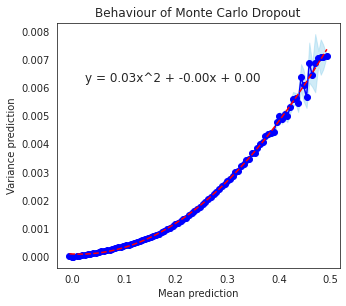

In [3]:
from locscale.emmernet.utils import plot_binned_correlation

fig, ax = plot_binned_correlation(mean_array, variance_array, 100, plot_diagonal=False, figsize_cm=(12,10))

# get the x axis array and y axis array
x = ax.get_lines()[0].get_xdata()
y = ax.get_lines()[0].get_ydata()

# fit a quadratic curve to the data and show the equation
z = np.polyfit(x, y, 2)
p = np.poly1d(z)
ax.plot(x,p(x),"r--")

equation_text = "y = {:.2f}x^2 + {:.2f}x + {:.2f}".format(*z)
ax.text(0.1, 0.8, equation_text, transform=ax.transAxes, fontsize=12,
        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

ax.set_xlabel("Mean prediction")
ax.set_ylabel("Variance prediction")
ax.set_title("Behaviour of Monte Carlo Dropout")

print(z)


Variance of f:  246.564599
Variance of scaled_f:  2219.0813909999997
Multiplicative factor:  9.0


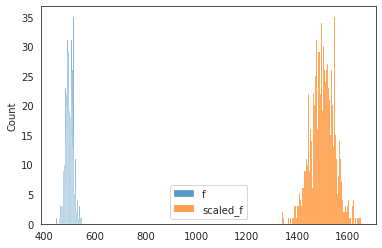

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
f = np.random.binomial(n=1000, p=0.5, size=1000)

variance = np.var(f)

scalar = 3 
scaled_f = f * scalar

scaled_variance = np.var(scaled_f)

sns.histplot(f, bins=100, label="f")
sns.histplot(scaled_f, bins=100, label="scaled_f")
plt.legend()
print("Variance of f: ", variance)
print("Variance of scaled_f: ", scaled_variance)
print("Multiplicative factor: ", scaled_variance/variance)
